In [1]:
# We'll be plotting the building permit activity Utah cities
# in the month of May by year. In order to do this, I'll be making
# a function that takes in a city and month, and returns a plot of that data.

In [2]:
# Import the depdendencies for this exercise.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import seaborn to make things BeAuTiFuL
import seaborn as sb

In [4]:
# First, we'll need to import the permits sheet as a dataframe. The function will
# read from this data, trim the dataframe down to only the pertinant information,
# and return a plot of that data.
permits_df = pd.read_excel('permits.xlsx')
permits_df

,Year,Month,County,City,New Dwelling Units,New Residental Valuation,New NonResidential Valuation,Value of Residental Additions,Value of Nonresidential Additions,Total Construction Value
0,1994,January,Beaver County,Beaver,0,0.0,0.0,0.0,0.0,0.0
1,1994,January,Beaver County,Milford,0,0.0,9.5,11.6,3.2,24.3
2,1994,January,Beaver County,Other Beaver Co,0,0.0,0.0,0.0,0.0,0.0
3,1994,January,Box Elder County,Brigham City,4,354.9,0.0,33.2,35.0,423.1
4,1994,January,Box Elder County,Corinne,0,0.0,0.5,3.5,0.0,4.0
5,1994,January,Box Elder County,Deweyville,0,0.0,0.0,0.0,0.0,0.0
6,1994,January,Box Elder County,Elwood,0,0.0,0.0,0.0,0.0,0.0
7,1994,January,Box Elder County,Garland,4,147.0,10.5,0.0,0.0,157.5
8,1994,January,Box Elder County,Howell,0,0.0,0.0,0.0,0.0,0.0
9,1994,January,Box Elder County,Mantua,1,83.4,0.0,0.0,0.0,83.4


In [5]:
# Create an array of the colors used in Tableau
tableau_colors = [
    (31, 119, 180),
    (174, 199, 232),
    (255, 127, 14),
    (255, 187, 120),
    (44, 160, 44),
    (152, 223, 138),
    (214, 39, 40),
    (148, 103, 189),
    (197, 176, 213),
    (140, 86, 75),
    (196, 156, 148),
    (227, 119, 194),
    (247, 182, 210),
    (127, 127, 127),
    (199, 199, 199),
    (188, 189, 34),
    (219, 219, 141),
    (23, 190, 207),
    (158, 218, 229),
]

# Scale those colors to the percent system MatPlotLib uses.
for i in range(len(tableau_colors)):
    r, g, b = tableau_colors[i]
    tableau_colors[i] = (r / 255., g / 255., b / 255.)
    

In [68]:
# Create an array of the cities we're plotting
cities = [
    'Provo',
    'Orem',
    'Lehi',
    'Spanish Fork',
]

In [69]:
# Define the month we'll be working with.
month = 'May'

Plotting Provo at (0, 0)
Plotting Orem at (0, 1)
Plotting Lehi at (1, 0)
Plotting Spanish Fork at (1, 1)


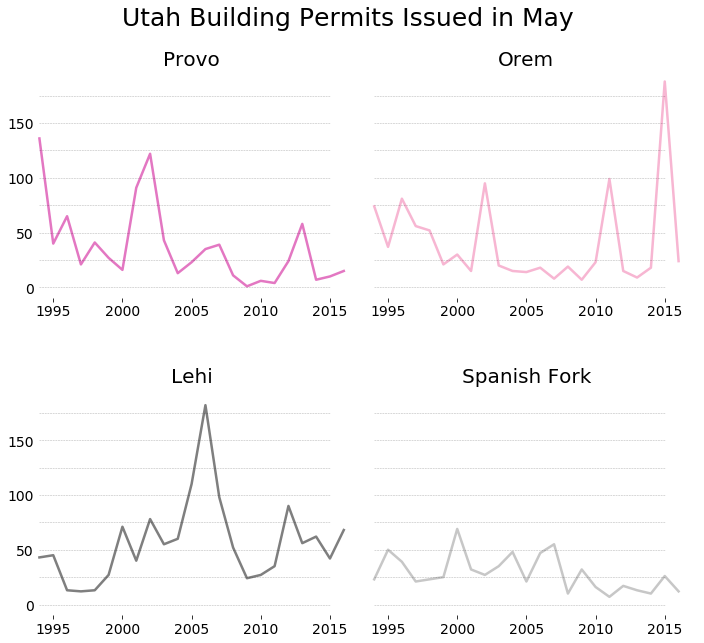

In [89]:
# Populate a new 2-columned figure with enough rows to store all of the requested cities.
fig, ax = plt.subplots(
    figsize = (12, 2.5 * len(cities)),
    nrows = int((len(cities) + 1) / 2),
    ncols = 2,
    sharey=True,
)

fig.subplots_adjust(wspace=-0,
                    hspace=0.4)

fig.suptitle("Utah Building Permits Issued in %s" % (month),
            fontsize = 25,
            y=0.97)

# Generate a random number to use for color pick, or set the color base to a chosen preset.
#color_base = np.random.randint(0, len(tableau_colors))
#print("Color base is %i" % (color_base))

color_base = 11

for i, city in enumerate(cities):
    
    # Derive which row and column this city will be plotted at, based on its enumeration
    row = (i / 2)
    col = (i % 2)
    row, col = int(row), int(col)
    
    print("Plotting %s at (%i, %i)" % (city, row, col))
    
    # Define the subplot as the one at the designated row and column
    axis = ax[row, col]
    
    # Create a dataframe with only the desired city and month
    city_df = permits_df[
        (permits_df['City'] == city) &
        (permits_df['Month'] == month)
    ]
    
    # Plot the amount of dwelling units per year.
    axis.plot(
        city_df['Year'], # x-axis
        city_df['New Dwelling Units'], # y-axis
        linestyle = '-',
        lw = 2.5,
        color=tableau_colors[(color_base + i) % len(tableau_colors)],
    )
    
    # Clean up the graph and axis itself, removing any graphical clutter.
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    axis.spines['right'].set_visible(False)
    
    axis.tick_params(axis='both',
                     labelsize=14,
                     left = False,
                     labelleft = (col == 0))
    
    axis.tick_params(axis = 'y',
                     pad = -13)
    
    # Add plot subtitles, making them prominant in the figure.
    axis.set_title(city,
                  fontsize = 20)
    
    # TODO: Make tick lines scale dynamically with data range
    for y in range(0, 176, 25):
        axis.plot(
            range(1994, 2016),
            [y] * len(range(1994, 2016)),
            '--',
            lw=0.5,
            color='black',
            alpha=0.3
        )
        
# Write the current plot to disk.
plt.savefig('permits_by_city.png', dpi=300)